In [1]:
import os
import re
import sys
import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
#pairwise also 
from Bio import pairwise2
import multiprocessing
from multiprocessing import Pool
import time
import argparse
import subprocess
import pandas as pd

/home/monster0811/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
# def generate_minhash_signature(k, n, num_hashes):
#     """Generate MinHash signature for the files"""
#     signature = []
#     for i in range(k):
#         with open(f'file{i}.txt', 'r') as file:
#             lines = file.readlines()
#             data = [int(line.strip()) for line in lines]

#         minhash = [float('inf')] * num_hashes  # Initialize with infinity

#         # Generate hash values using different hash functions
#         for num in data:
#             for j in range(num_hashes):
#                 hash_val = int(hashlib.sha256(str(num).encode() + str(j).encode()).hexdigest(), 16)
#                 minhash[j] = min(minhash[j], hash_val)

#         signature.append(minhash)

#     return signature


#i want to do this for fasta files sequences 
data = {}

In [3]:
def get_fasta_files(directory):
    files = os.listdir(directory)
    fasta_files = []
    for file in files:
        if re.search(r"\.fasta$", file):
            fasta_files.append(file)
    return fasta_files

In [4]:
fasta_files = get_fasta_files("chi")

In [5]:
for file in fasta_files:
    with open("chi/" + file, "r") as f:
        data[file] = {}

In [6]:
from Bio import SeqIO
for file in fasta_files:
    for record in SeqIO.parse("chi/" + file, "fasta"):
        data[file][record.id] = str(record.seq)

In [7]:
sequences = []
labels = []
for file in data:
    for header in data[file]:
        sequences.append(data[file][header])
        labels.append(header)

In [8]:
#Now I want to encode the sequences using integers 
#Find the unique characters in the sequences
unique_chars = set()
for seq in sequences:
    for char in seq:
        unique_chars.add(char)

print(unique_chars)

{'C', 'S', 'K', 'W', 'G', 'N', 'T', 'Y', 'M', 'R', 'A'}


In [11]:
dict_encode = {}
dict_encode["A"] = 0
dict_encode["C"] = 1
dict_encode["G"] = 2
dict_encode["T"] = 3
dict_encode["N"] = 4
dict_encode["K"] = 5
dict_encode["M"] = 6
dict_encode["R"] = 7
dict_encode["Y"] = 8
dict_encode["S"] = 9
dict_encode["W"] = 9

In [15]:
#Now I want to encode the sequences
encoded_sequences = []
for seq in sequences:
    encoded_seq = ""
    for char in seq:
        encoded_seq += str(dict_encode[char])
    encoded_sequences.append(encoded_seq)

In [51]:
#Now in the "text_files_draft" I want to create text files with the encoded sequences
#filei should contain the encoded sequence of sequences[i] in a single line
from tqdm import tqdm
for i in tqdm(range(len(encoded_sequences))):
    with open("text_files_draft/file" + str(i) + ".txt", "w") as f:
        for char in encoded_sequences[i]:
            f.write(char + "\n")

100%|██████████| 600/600 [00:00<00:00, 1226.19it/s]


In [52]:
import hashlib

In [53]:
def generate_minhash_signature(k, n, num_hashes):
    """Generate MinHash signature for the files"""
    signature = []
    for i in range(k):
        with open(f'text_files_draft/file{i}.txt', 'r') as file:
            lines = file.readlines()
            data = [int(line.strip()) for line in lines]

        minhash = [float('inf')] * num_hashes  # Initialize with infinity

        # Generate hash values using different hash functions
        for num in data:
            for j in range(num_hashes):
                hash_val = int(hashlib.sha256(str(num).encode() + str(j).encode()).hexdigest(), 16)
                minhash[j] = min(minhash[j], hash_val)

        signature.append(minhash)

    return signature

In [54]:
def jaccard_similarity(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    similarity = intersection / union
    
    return similarity

In [56]:
num_hashes = 32
minhash_signature = generate_minhash_signature(10, 400, num_hashes)
print(len(minhash_signature))

10


In [23]:
sys.set_int_max_str_digits(1000000)

In [57]:
results_adj = [[0 for i in range(10)] for j in range(10)]


In [61]:
minhash_signature[0]

[33592815351635838866227505544683417564162321228075154218315436012476449103317,
 36086382269012570414081057885610197198624807447239154225720840125343131365048,
 48542053925442562206970678378617219313498267117402160926478466274825158240536,
 5228061486908932226632210209044000869953958300726290158676187205325735086821,
 49227388366108754026539056524577080060162897886300886731715804805895659173056,
 71953096121200381858190606868033578978002462554343674489942508713932245649747,
 43245864246510675257312248132617625559829538603954510829955139939433940403402,
 11620557767746015736841910758982332764899790446639126951736244978155058661397,
 22713728285139926135536087108694117274030241282423681027698142237296734904014,
 5232581527863235096587321474292674180630556774295345035650804382406877176825,
 8794256433647612601947912683678015128081609394946539185888446998157672201121,
 4163054995028552258444665509676011599042945042705318415419874625137952516536,
 6076401446018777650260879674203966237209389

In [62]:
minhash_signature[1]

[33592815351635838866227505544683417564162321228075154218315436012476449103317,
 36086382269012570414081057885610197198624807447239154225720840125343131365048,
 48542053925442562206970678378617219313498267117402160926478466274825158240536,
 5228061486908932226632210209044000869953958300726290158676187205325735086821,
 49227388366108754026539056524577080060162897886300886731715804805895659173056,
 71953096121200381858190606868033578978002462554343674489942508713932245649747,
 43245864246510675257312248132617625559829538603954510829955139939433940403402,
 11620557767746015736841910758982332764899790446639126951736244978155058661397,
 22713728285139926135536087108694117274030241282423681027698142237296734904014,
 5232581527863235096587321474292674180630556774295345035650804382406877176825,
 8794256433647612601947912683678015128081609394946539185888446998157672201121,
 4163054995028552258444665509676011599042945042705318415419874625137952516536,
 6076401446018777650260879674203966237209389

In [60]:
start = time.time()

for i in range(10):
    data_1 = minhash_signature[i]
    for j in range(i,10):
        data_2 = minhash_signature[j]
        sim = jaccard_similarity(data_1,data_2)
        results_adj[i][j] = sim
        results_adj[j][i] = sim
        
end = time.time()
print("{} minutes".format(round((end - start)/60,2)))

0.0 minutes


In [59]:
results_adj

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0],
 [0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0]]

In [28]:
adj_new = 1-np.array(results_adj)

In [41]:
for i in range(1,11):
    print("womp",adj_new[0][i],"back", adj_new[0][599-i])

womp 1.0 back 1.0
womp 1.0 back 1.0
womp 1.0 back 1.0
womp 1.0 back 1.0
womp 1.0 back 1.0
womp 1.0 back 1.0
womp 1.0 back 1.0
womp 1.0 back 1.0
womp 1.0 back 1.0
womp 1.0 back 1.0


/tmp/ipykernel_225632/2278815613.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(adj_new, 'ward')


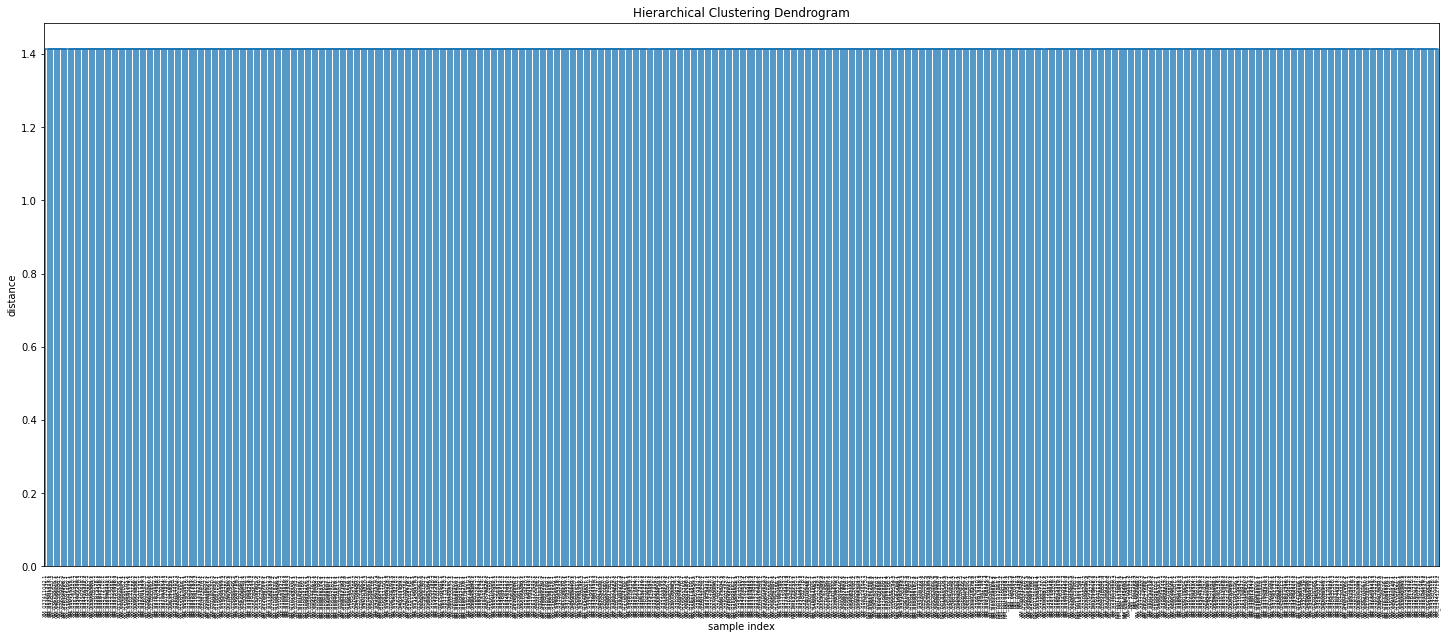

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Z = linkage(adj_new, 'ward')
# plt.figure(figsize=(25, 10))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('sample index')
# plt.ylabel('distance')
# dendrogram(Z, labels=labels, leaf_rotation=90)
# plt.show()

# #download the dendrogram
# plt.savefig("dendrogram.png")

#adjust the horizontal scale 
Z = linkage(adj_new, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, labels=labels, leaf_rotation=90)
plt.show()

In [37]:
num_clusters = 2
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, num_clusters, criterion='maxclust')
from collections import Counter
Counter(clusters)

Counter({1: 600})

In [39]:
#Kmeans 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(adj_new)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [40]:
Counter(kmeans.labels_)

Counter({1: 599, 0: 1})